Tutorial: https://realpython.com/knn-python/#:~:text=model%20is%20computed.-,kNN%20Is%20a%20Supervised%20Learner%20for%20Both%20Classification%20and%20Regression,with%20a%20categorical%20target%20variable.

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

url = ("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data")

abalone = pd.read_csv(url, header=None)

In [9]:
abalone.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [10]:
abalone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       4177 non-null   object 
 1   1       4177 non-null   float64
 2   2       4177 non-null   float64
 3   3       4177 non-null   float64
 4   4       4177 non-null   float64
 5   5       4177 non-null   float64
 6   6       4177 non-null   float64
 7   7       4177 non-null   float64
 8   8       4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [11]:
abalone.columns = [
    "Sex",
    "Length",
    "Diameter",
    "Height",
    "Whole Weight",
    "Shucked Weight",
    "Viscera Weight",
    "Shell Weight",
    "Rings"
]

In [12]:
abalone = abalone.drop("Sex", axis=1)

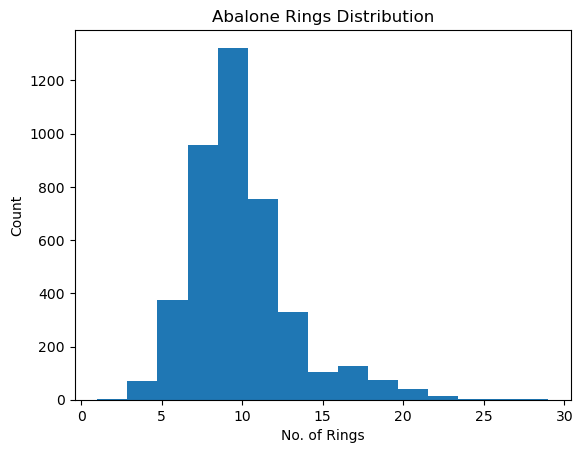

In [16]:
fig, ax = plt.subplots(1,1)

ax.hist(abalone['Rings'], bins = 15)
ax.set_ylabel("Count")
ax.set_xlabel("No. of Rings")
ax.set_title("Abalone Rings Distribution")

plt.show()

In [17]:
# Build a correlation matrix to figure out which of the independent variables have any correlation with the target variable Rings

correlation_matrix = abalone.corr()
correlation_matrix['Rings']

Length            0.556720
Diameter          0.574660
Height            0.557467
Whole Weight      0.540390
Shucked Weight    0.420884
Viscera Weight    0.503819
Shell Weight      0.627574
Rings             1.000000
Name: Rings, dtype: float64

In [32]:
correlation_matrix

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole Weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked Weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera Weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell Weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


## Build KNN from Scratch

In [18]:
# Define "nearest" using a mathematical definition of closeness - Euclidean distance
a = np.array([2,2])
b = np.array([4,4])
np.linalg.norm(a-b)

2.8284271247461903

In [19]:
X = abalone.drop("Rings", axis=1)
X = X.values

Y = abalone["Rings"]
Y = Y.values

In [20]:
# Apply KNN with k=3 for a new Abalone with the following properties

new_data_point = np.array([
    0.569552,
    0.446407,
    0.154437,
    1.016849,
    0.439051,
    0.222526,
    0.291208
])

# Next step is to compute the distance between this new data point and each of the datapoints in the Abalone data set using the np.linalg.norm()

distances = np.linalg.norm(X - new_data_point, axis=1)

In [38]:
# testing with only one pair of data points 
np.linalg.norm(X[0] - new_data_point)

0.5973939518140436

In [21]:
# We now have a vector of distances and need to figure out which three are the closest neighbors
# Use .argsort() and take first k elements

k = 3
nearest_neighbors_ids = distances.argsort()[:k]
nearest_neighbors_ids

array([4045, 1902, 1644])

In [22]:
# Now we need to combine these neighbors into a prediction
# Find actual values
nearest_neighbors_rings = Y[nearest_neighbors_ids]
nearest_neighbors_rings

array([ 9, 11, 10])

In [39]:
# For regression problems, take an average
# For classification problems, take a mode

prediction = nearest_neighbors_rings.mean()
prediction

10.0

## Fit KNN in Python using ScikitLearn

In [25]:
# Split data into training and test
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3333)

In [27]:
# now fit the model with the correct hyperparameter
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=3) # this is currently an unfitted model

# fit the model onto the data
knn_model.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=3)

#### Inspecting the model fit

In [28]:
# Use RMSE for evaluation
from sklearn.metrics import mean_squared_error
from math import sqrt

# RMSE on training data
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(Y_train, train_preds)
rmse = sqrt(mse)
rmse

1.6888378651201563

In [29]:
# RMSE on test data
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(Y_test, test_preds)
rmse = sqrt(mse)
rmse

2.401598794069644

You can observe a relatively large difference between the RMSE on the training data and the RMSE on the test data. This means that the model suffers from *overfitting* on the training data: It does not generalize well.

### Plotting fit of the model

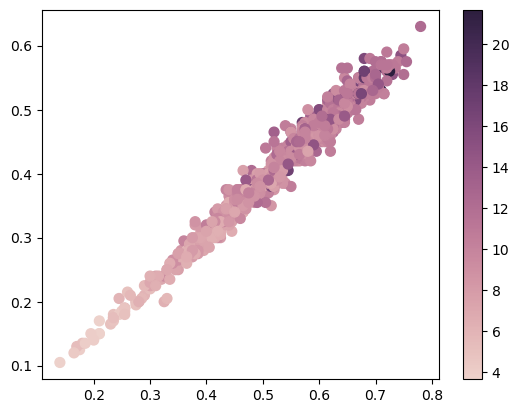

In [31]:
import seaborn as sns
cmap = sns.cubehelix_palette(as_cmap=True)

fig, ax = plt.subplots()

points = ax.scatter(X_test[:,0], X_test[:,1], c=test_preds, s=50, cmap=cmap)

fig.colorbar(points)

plt.show()

## Tune and Optimize KNN using Scikit-Learn

To find the best value for k, you’re going to use a tool called GridSearchCV. This is a tool that is often used for tuning hyperparameters of machine learning models. In your case, it will help by automatically finding the best value of k for your dataset.

In [40]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1,50)}
gridsearch = GridSearchCV(KNeighborsRegressor(), parameters)
gridsearch.fit(X_train, Y_train)

GridSearchCV(estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': range(1, 50)})

In [41]:
gridsearch.best_params_

{'n_neighbors': 21}

In [47]:
train_preds_grid = gridsearch.predict(X_train)
train_mse = mean_squared_error(Y_train, train_preds_grid)
train_rmse = sqrt(train_mse)

test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(Y_test, test_preds_grid)
test_rmse = sqrt(test_mse)

print("Train RMSE: "+str(train_rmse)+", Test RMSE: "+str(test_rmse))

Train RMSE: 2.0646905150065296, Test RMSE: 2.151380481937595


With this code, you fit the model on the training data and evaluate the test data. You can see that the training error is worse than before, but the test error is better than before. This means that your model fits less closely to the training data. Using GridSearchCV to find a value for k has reduced the problem of overfitting on the training data.